In [8]:
## instantaneous goodput

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sizeSet = [20,30,40,50,60,70,80]
# delaySet = [10,50,100]
schedulerTypes = [0]


# get complete time
# dynamic = ["","1","2"]


def help(i):
    dir = 'rate-send-3-5242880'
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    # finish_time = float(file.readlines()[-1].split('\t')[0])
    lines = file.readlines()
    lines[-1].split('\t')
    interval = [[0 for i in range(5000)] for i in range(2)]
    tempInt = [[0 for i in range(5000)] for i in range(2)]
    hash = [[0 for i in range(5000)] for i in range(2)]
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == 'retx'):
            hash[int(temp[1])][int(temp[2])] = int(temp[3])
        if (temp[0] == 'send'):
            tempInt[int(temp[1])][int(temp[2])] = float(temp[3])
        if (temp[0] == 'recv'):
            interval[int(temp[1])][int(temp[2])] = float(temp[3]) - tempInt[int(temp[1])][int(temp[2])]
            
            # pktNew = int(temp[2])
            # if (pktNew not in hash[int(temp[1])]):
            #     interval[int(temp[1])][int(temp[2])] = float(temp[3]) - tempInt[int(temp[1])][int(temp[2])]
            # else: 
            #     pktOrg = hash[int(temp[1])].index(pktNew)
            #     if (interval[int(temp[1])][pktOrg] == 0 ):
            #         interval[int(temp[1])][pktOrg] = float(temp[3]) - tempInt[int(temp[1])][pktOrg]
        
            

    # dataTotal = pd.DataFrame (interval, columns = ['Path0', 'Path1'])     
    result = []
    for i in interval[0]:
        if (i != 0):
            result.append(i)
            
    for i in interval[1]:
        if (i != 0):
            result.append(i)
        
    # print(len(interval[0]))
    # dataTotal = pd.DataFrame (result, columns = ['Time'])
    # print(len(result))   
    return result


rr = help(0)  
minrtt = help(1)
blest = help(2)  
ecf = help(3)
mab = help(5)  




[0.01    0.01    0.01    ... 0.48556 0.56268 0.7744 ]


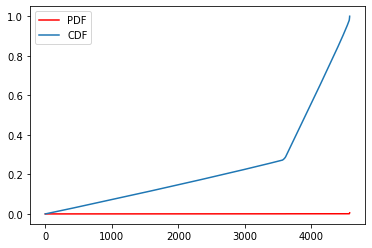

In [9]:
# rr = dataTotal.loc[dataTotal['scheduler'] == "0"]
# minrtt = dataTotal.loc[dataTotal['scheduler'] == "1"]
# blest = dataTotal.loc[dataTotal['scheduler'] == "2"]
# print(min(rr['Time']))
# a = np.array(rr)
a = np.sort(rr)
print(a)
pdf = a / sum(a)
cdf= np.cumsum(pdf)
# print(rr)
# plt.plot(a)
plt.plot(pdf, color="red", label="PDF")
plt.plot(cdf, label="CDF")
plt.legend()

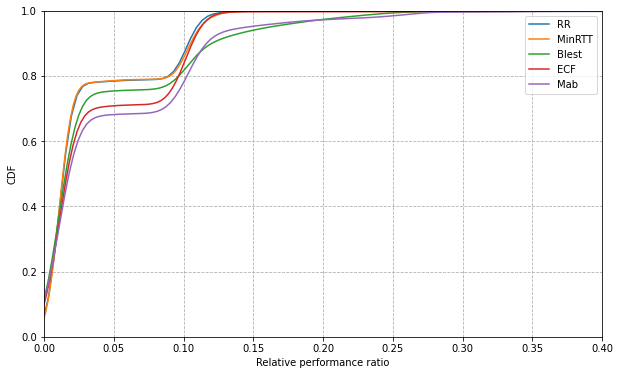

In [14]:
# print(mab)
import seaborn as sns

plt.figure(figsize=(10,6))
# sns.ecdfplot(data = rr, label = "RR")
# sns.ecdfplot(data = minrtt, label = "MinRTT")
# sns.ecdfplot(data = blest, label = "Blest")
# sns.ecdfplot(data = ecf, label = "ECF")
# sns.ecdfplot(data = mab, label = "Mab")
sns.kdeplot(data = rr, cumulative = True, label = "RR")
sns.kdeplot(data = minrtt, cumulative = True, label = "MinRTT")
sns.kdeplot(data = blest, cumulative = True, label = "Blest")
sns.kdeplot(data = ecf, cumulative = True, label = "ECF")
sns.kdeplot(data = mab, cumulative = True, label = "Mab")
plt.legend()
plt.grid(linestyle="--") 
plt.xlim(0,0.4)
plt.ylim(0,1)
plt.xlabel("Relative performance ratio")
plt.ylabel("CDF")
# plt.savefig('./performance-ratio-cdf.png', format='png')
plt.show()

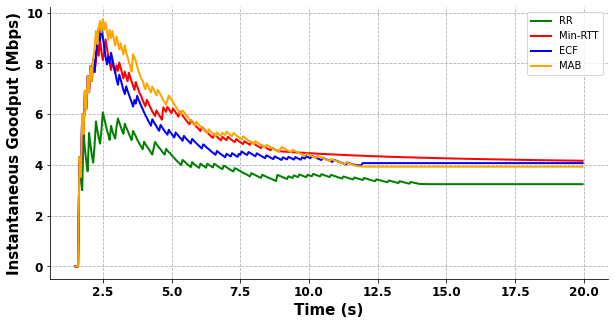

In [8]:

plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=2)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="Min-RTT", linewidth=2)
# plt.plot(blest['Time'], blest['goodput'], color="green", label="BLEST", linewidth=1.5)
plt.plot(ecf['Time'], ecf['goodput'], color="blue", label="ECF", linewidth=2)
plt.plot(mab['Time'], mab['goodput'], color="orange", label="MAB", linewidth=2)

# group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9']  # x轴刻度的标识
plt.xticks(fontsize=12, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Instantaneous Goodput (Mbps)", fontsize=15, fontweight='bold')
plt.xlabel("Time (s)", fontsize=15, fontweight='bold')
# plt.xlim(0.9, 6.1)  # 设置x轴的范围
# plt.ylim(0, 5)

# # plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./ins_goodput.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()
